In [1]:
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
import torchvision.transforms as transforms
import numpy as np
import os
from PIL import Image
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
device = "cuda"

In [2]:
model = torchvision.models.vgg16(pretrained=True)
model.eval()
model = model.to(device)

In [3]:
f = open('../1000.txt')
text1000 = f.read().split("\n")
f.close()

In [4]:

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [5]:
def create_heatmap(img_fn):
    image = Image.open(img_fn)
    display.display(image)
    image = preprocess(image).to(device)
    image = image.reshape(1,*image.shape)
    output = model(image)
    idx = torch.argmax(output)
    print(text1000[idx])
    plt.imshow(np.array(image.cpu())[0].transpose(1,2,0))
    plt.show()
    heatmap = torch.zeros((*image.shape[2:])).to(device)
    for w in range(256//8+64//8):
        for h in range(256//8+64//8):
            x = (w-64//8)*8
            y = (h-64//8)*8
            mask = torch.zeros_like(image,dtype=torch.bool)
            mask[0,:,max(0,y):y+64,max(0,x):x+64]=1
            masked_image = image.clone()
            masked_image[mask]=0
            out_ = model(masked_image)
            diff = output[0,idx] - out_[0,idx].detach()
            heatmap[mask[0][0][:,:]] += diff#.abs()
    plt.imshow(np.array(heatmap.detach().cpu()))
    plt.show()

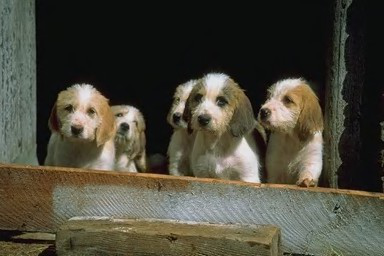

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


n02096437 Dandie Dinmont, Dandie Dinmont terrier


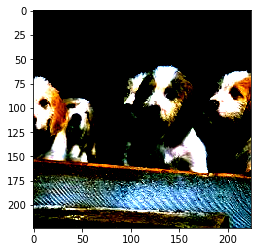

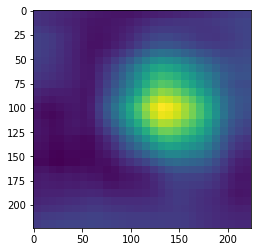

In [6]:
create_heatmap("/export/data/dataset/animal/dog/415000.jpg")

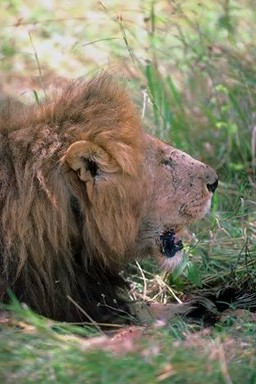

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


n02129165 lion, king of beasts, Panthera leo


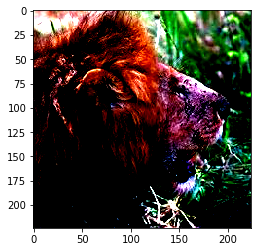

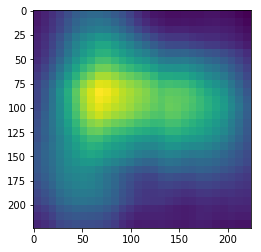

In [7]:
create_heatmap("/export/data/dataset/animal/lion/105084.jpg")

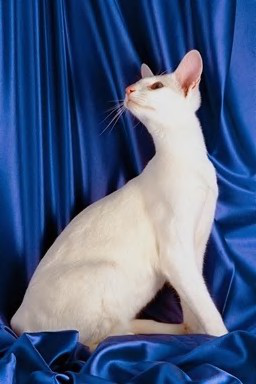

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


n02085620 Chihuahua


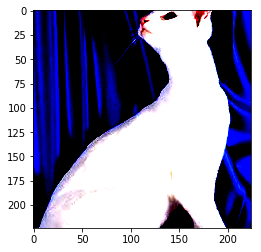

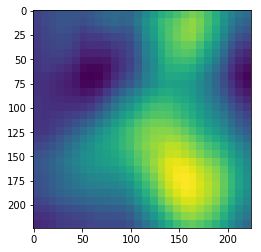

In [8]:
create_heatmap("/export/data/dataset/animal/cat/458050.jpg")

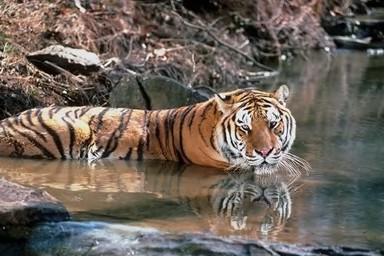

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


n02129604 tiger, Panthera tigris


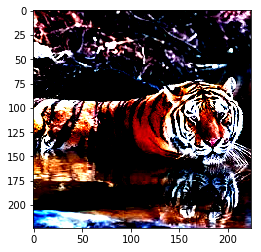

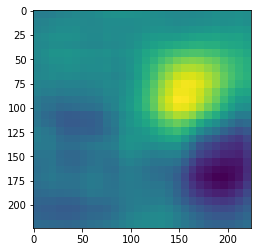

In [9]:
create_heatmap("/export/data/dataset/animal/tiger/108002.jpg")

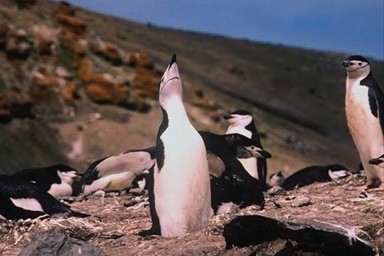

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


n02056570 king penguin, Aptenodytes patagonica


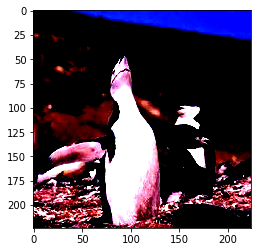

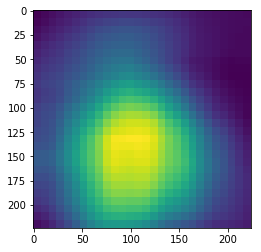

In [10]:
create_heatmap("/export/data/dataset/animal/penguin/541049.jpg")